In [99]:
import hifive
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pyBigWig


In [37]:
hic=hifive.HiC('project', 'r')
data = hic.cis_heatmap('chr13', 1000000, datatype='fend', arraytype='full', diagonalincluded=True)
print(data)

[[[0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00]
  ...
  [0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00]]

 [[0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00]
  ...
  [0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00]]

 [[0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00]
  ...
  [0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00]]

 ...

 [[0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00]
  ...
  [1.3408000e+04 8.7311667e-01]
  [2.4900000e+03 1.0417298e+00]
  [4.3400000e+02 7.7956390e-01]]

 [[0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00]
  ...
  [2.4900000e+03 1.0417298e+00]
  [1.8256000e+04 1.2429050e+00]
  [1.9310000e+03 9.3011051e-

Finding fend full array for chr13:1000000-120250001... Done


In [38]:
#np.where(data>0[:, :, 1])
np.asarray(data[:,:,1]).nonzero()

(array([  20,   20,   20, ..., 1192, 1192, 1192]),
 array([  20,   21,   22, ..., 1190, 1191, 1192]))

In [39]:
#enrichment = data[:,:,0]/np.asarray(data[:,:,1]).nonzero()

In [40]:
# count=0
# for i in data:
#     enrichment = data[:, :, count] / data[:, :, count+1]
#     count = count + 1
#     if enrichment == NaN:
#         continue

In [58]:
ndata = data + 1

In [59]:
enrichment = ndata[:, :, 0] / ndata[:, :, 1]

In [81]:
log = np.log(enrichment)

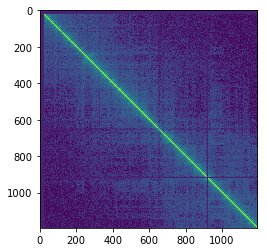

In [82]:
fig, ax = plt.subplots()
heatmap = ax.imshow(log)

In [62]:
Comp = hifive.hic_domains.Compartment(hic, 100000, chroms=['chr13'], out_fname='tmp.hdf5')
Comp.write_eigen_scores('hic_comp.bed')

Finding expected full array for chr13:3000000-120300000... Done
Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arr

In [75]:
X = Comp.positions['chr13']
Y = Comp.eigenv['chr13']
len(X)
#len(Y)

1168

ValueError: x and y must be the same size

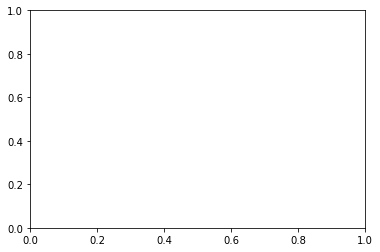

In [76]:
# plot your compartment scores
# fig, ax = plt.subplots()
# ax = plt.subplots(X,Y)
plt.scatter(X, Y)
#Okay. I checked and they are the same size.  
#Is this why I need python 2?


In [ ]:
#So, the next thing you are going to do is to 
#split genes into two groups determined by which compartment they 
#fall at least 50% into (positive vs. negative scores) and 
#plot each group of gene expressions separately in a violin plot in 
#matplotlib

In [88]:
#print(X[2])
Xneg=[]
for i in X:
    if np.any(i<0):
        Xneg.append(i)
        
print(Xneg)

[]


In [90]:
Yneg=[]
Ypos=[]
for i in Y:
    if np.any(i<0):
        Yneg.append(i)
    else:
        Ypos.append(i)

In [92]:

# fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))

# axs[0, 0].violinplot(Ynegs, pos, points=20, widths=0.3,
#                      showmeans=True, showextrema=True, showmedians=True)
# axs[0, 1].violinplot(Ypos, pos, points=20, widths=0.3,
#                      showmeans=True, showextrema=True, showmedians=True)

{u'bodies': [<matplotlib.collections.PolyCollection at 0x7f9b676c9a50>],
 u'cbars': <matplotlib.collections.LineCollection at 0x7f9b676c9290>,
 u'cmaxes': <matplotlib.collections.LineCollection at 0x7f9b673b4f50>,
 u'cmins': <matplotlib.collections.LineCollection at 0x7f9b676c9510>}

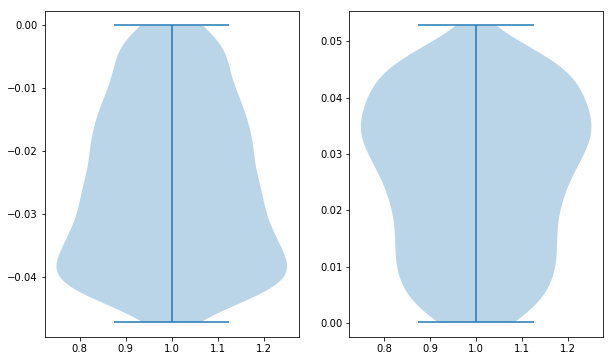

In [98]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
axs[0].violinplot(Yneg)
axs[1].violinplot(Ypos)

In [100]:
bw = pyBigWig.open('data/WT_H3K27me3.bw')
bw.stats('chr1', 1100000, 1200000, type='sum')

[None]